# Bootleg Macro Testing Ground :dog: :cat: :bird: :eggplant:

## Explore various functionalities here.

### Searching for asset ticker symbols and building watchlists.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
%load_ext autoreload
%autoreload 2

plt.rcParams["backend"] = "QtAgg"
plt.rcParams["figure.dpi"] = 110
plt.rcParams["figure.figsize"] = (12, 5)

wd = %pwd
import os
fdel = os.path.sep

from MacroBackend import Utilities, PriceImporter, Pull_Data, Charting
import datetime

keys = Utilities.api_keys()
print(keys.keys)
myFredAPI_key = keys.keys['fred']
DataStart = "2021-01-01"
EndDateStr = datetime.date.today().strftime("%Y-%m-%d")



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/Users/jamesbishop/Documents/Python/Bootleg_Macro/MacroBackend /Users/jamesbishop/Documents/Python/Bootleg_Macro
Looking for api keys in SystemInfo folder... /Users/jamesbishop/Documents/Python/Bootleg_Macro/MacroBackend/SystemInfo/API_Keys.json
API_keys found but the "API_Keys_demo.json" file is still present... Delete that file to silence this warning.
{'fred': 'f632119c4e0599a3229fec5a9ac83b1c', 'glassnode': '2RpkhVDN1GXAgTNG23u9lhHQCJL', 'bea': '779F26DA-1DB0-4CC2-94DD-2AE3492DA4FC', 'quandl': 'ChHHNTWkY4rb3aYoYepw'}


## Pull data series from the Federal Reserve Economic Database (FRED)

In [4]:
seriesInfo, series = PriceImporter.PullFredSeries("M2SL",myFredAPI_key,start=DataStart,end=EndDateStr,Con2Bil=True)
series

FRED API response:  200
date
2021-01-06      0.000
2021-01-07      0.000
2021-01-08      0.000
2021-01-09      0.000
2021-01-10      0.000
               ...   
2024-06-01    108.249
2024-06-02    108.249
2024-06-03    108.249
2024-06-04    108.249
2024-06-05    107.834
Freq: D, Name: H41RESPPALDKNWW, Length: 1247, dtype: float64


date
2021-01-06      0.000
2021-01-07      0.000
2021-01-08      0.000
2021-01-09      0.000
2021-01-10      0.000
               ...   
2024-06-01    108.249
2024-06-02    108.249
2024-06-03    108.249
2024-06-04    108.249
2024-06-05    107.834
Freq: D, Name: H41RESPPALDKNWW, Length: 1247, dtype: float64

## Get Data from Yahoo Finance via python based Web scrapers.

### Earnings data, price history and more...

#### python package yahoofinancials. There are also yfinance & yahoo_fin package options.

In [5]:
from yahoofinancials import YahooFinancials as yf
import datetime
start_date = "2018-01-01"
end_date = datetime.date.today().strftime("%Y-%m-%d")
ticker = yf("TSLA")
#data = ticker.get_historical_price_data("2000-01-01", end_date, "daily")

#data
data = ticker.get_historical_price_data(start_date, end_date, "daily")
data.keys()
data["TSLA"].keys()
df = pd.DataFrame(data["TSLA"]["prices"]).set_index("formatted_date", drop=True).drop("date", axis=1)
df

,high,low,open,close,volume,adjclose
formatted_date,,,,,,
2018-01-02,21.474001,20.733334,20.799999,21.368668,65283000,21.368668
2018-01-03,21.683332,21.036667,21.400000,21.150000,67822500,21.150000
2018-01-04,21.236668,20.378668,20.858000,20.974667,149194500,20.974667
2018-01-05,21.149332,20.799999,21.108000,21.105333,68868000,21.105333
2018-01-08,22.468000,21.033333,21.066668,22.427334,147891000,22.427334
...,...,...,...,...,...,...
2024-06-03,182.639999,174.490005,178.130005,176.289993,68568900,176.289993
2024-06-04,177.759995,174.000000,174.779999,174.770004,60056300,174.770004
2024-06-05,176.149994,172.130005,175.350006,175.000000,57953800,175.000000


### Using javascript. Node package yfinance2. This allows searching of yahoo finance site. 

In [2]:
from MacroBackend import js_funcs, search_symbol_gui

results = js_funcs.search_yf_tickers("AMZN")
#print(type(results), results.keys(), "\n\n", results["News"], "\n\n", results["Tickers"])
results["tickers_df"]

/Users/jamesbishop/Documents/miniconda3/envs/financial/lib/node_modules
Looking for api keys in SystemInfo folder... /Users/jamesbishop/Documents/Python/Bootleg_Macro/MacroBackend/SystemInfo/API_Keys.json
API_keys found but the "API_Keys_demo.json" file is still present... Delete that file to silence this warning.
Success with yfinance request.


,exchange,shortname,quoteType,symbol,index,score,typeDisp,longname,exchDisp,sector,sectorDisp,industry,industryDisp,dispSecIndFlag,isYahooFinance
Result #,,,,,,,,,,,,,,,
0,NMS,"Amazon.com, Inc.",EQUITY,AMZN,quotes,2359500,Equity,"Amazon.com, Inc.",NASDAQ,Consumer Cyclical,Consumer Cyclical,Internet Retail,Internet Retail,True,True
1,PCX,Tidal ETF Trust II YieldMax AMZ,ETF,AMZY,quotes,20012,ETF,YieldMax AMZN Option Income Strategy ETF,NYSEArca,NaN,NaN,NaN,NaN,NaN,True
2,OPR,AMZN Jul 2024 180.000 call,OPTION,AMZN240719C00180000,quotes,20009,Option,AMZN Jul 2024 180.000 call,OPR,NaN,NaN,NaN,NaN,NaN,True
3,OPR,AMZN Jan 2026 205.000 call,OPTION,AMZN260116C00205000,quotes,20009,Option,AMZN Jan 2026 205.000 call,OPR,NaN,NaN,NaN,NaN,NaN,True
4,OPR,AMZN Sep 2024 155.000 put,OPTION,AMZN240920P00155000,quotes,20008,Option,AMZN Sep 2024 155.000 put,OPR,NaN,NaN,NaN,NaN,NaN,True
5,OPR,AMZN Jan 2025 150.000 call,OPTION,AMZN250117C00150000,quotes,20007,Option,AMZN Jan 2025 150.000 call,OPR,NaN,NaN,NaN,NaN,NaN,True


## RUN THIS CELL TO BRING UP THE SEARCH DATA GUI

In [3]:
%gui qt

ui = search_symbol_gui.run_app()

Icon path:  /Users/jamesbishop/Documents/Python/Bootleg_Macro/MacroBackend/app_icon.png <PyQt6.QtGui.QIcon object at 0x137425950>
Selected source: fred
The source value is a function...


qt.qpa.fonts: Populating font family aliases took 233 ms. Replace uses of missing font family "Sans Serif" with one that exists to avoid this cost. 


Row selected:  id                                                                 WPUSI019011
realtime_start                                                      2024-06-09
realtime_end                                                        2024-06-09
title                        Producer Price Index by Commodity: Special Ind...
observation_start                                                   1967-01-01
observation_end                                                     2024-04-01
frequency                                                              Monthly
frequency_short                                                              M
units                                                           Index 1982=100
units_short                                                     Index 1982=100
seasonal_adjustment                                    Not Seasonally Adjusted
seasonal_adjustment_short                                                  NSA
last_updated                         

In [4]:
ui

{3: id                                                                 WPUSI019011
 realtime_start                                                      2024-06-09
 realtime_end                                                        2024-06-09
 title                        Producer Price Index by Commodity: Special Ind...
 observation_start                                                   1967-01-01
 observation_end                                                     2024-04-01
 frequency                                                              Monthly
 frequency_short                                                              M
 units                                                           Index 1982=100
 units_short                                                     Index 1982=100
 seasonal_adjustment                                    Not Seasonally Adjusted
 seasonal_adjustment_short                                                  NSA
 last_updated                        

### Explore different matplotliob pre-set chart styles using the pandas shorthand method

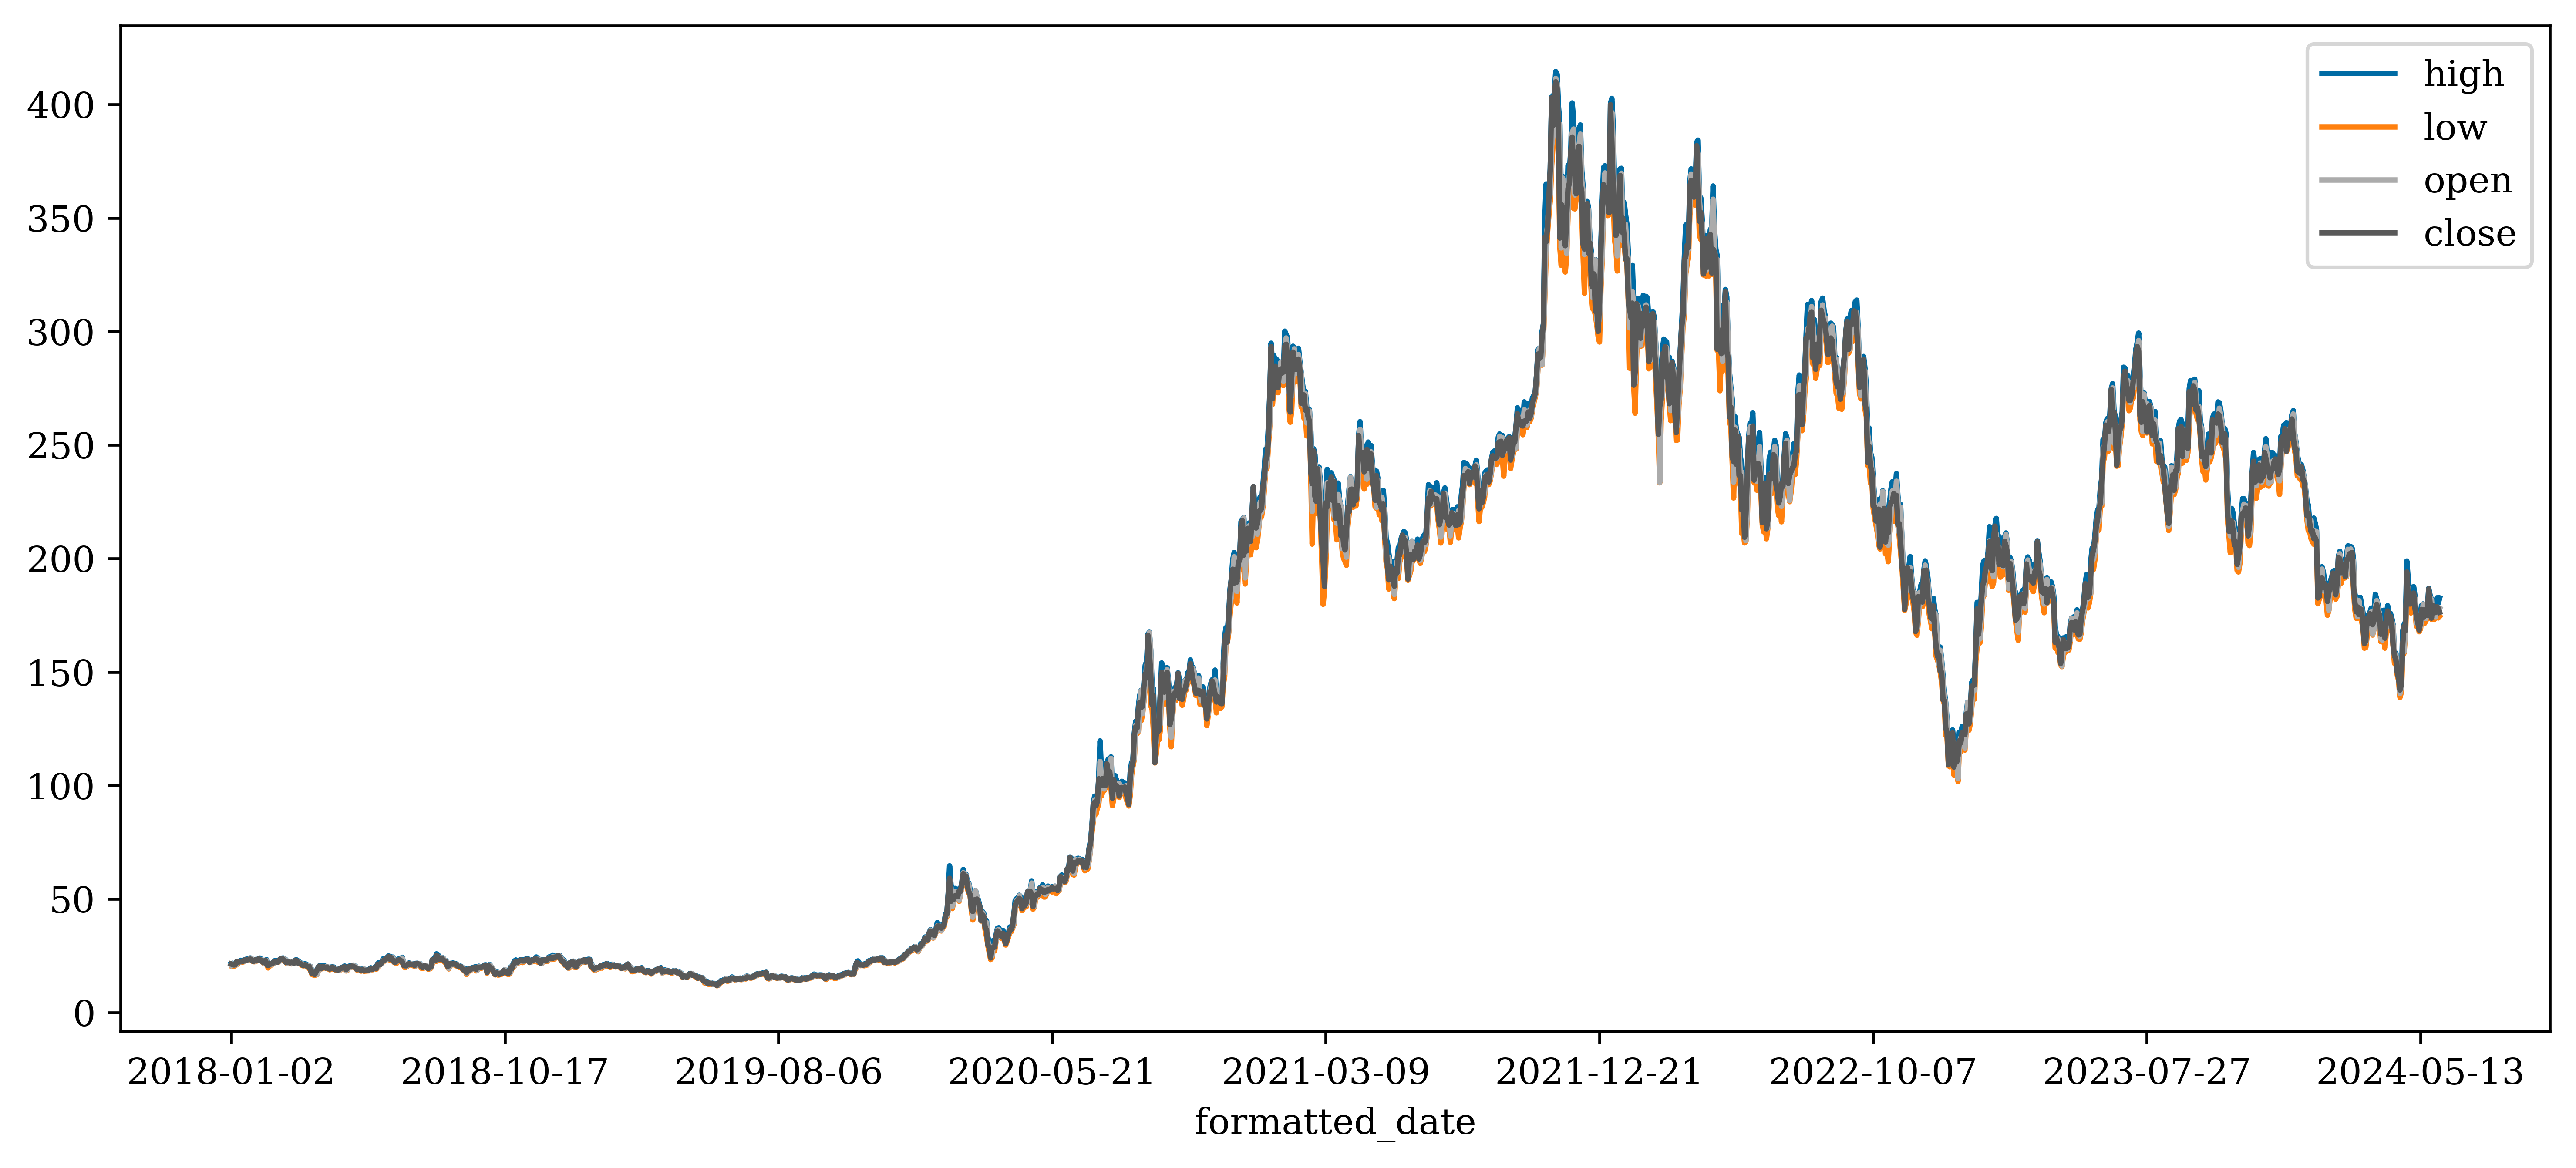

In [ ]:
# In [3]: print(plt.style.available)
plt_styles = ['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 
 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 
 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 
 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']

# Use seaborn style
plt.style.use("tableau-colorblind10")

df[df.columns[0:4]].plot()
%matplotlib inline
plt.show()

In [ ]:
print("Getting US budget deficit data from FRED.")
def_start_date = "1990-01-01"
deficit_info, deficit = PriceImporter.PullFredSeries("MTSDS133FMS",myFredAPI_key,start=def_start_date,end=EndDateStr,Con2Bil=True)
last_date = deficit.index[-1]  # get the last date which is a month start
last_day_of_month = last_date + pd.offsets.MonthEnd(1)  # get the last day of that month
Findex = pd.date_range(def_start_date,last_day_of_month,freq='D')
Findex

Getting US budget deficit data from FRED.
FRED API response:  200


DatetimeIndex(['1990-01-01', '1990-01-02', '1990-01-03', '1990-01-04',
               '1990-01-05', '1990-01-06', '1990-01-07', '1990-01-08',
               '1990-01-09', '1990-01-10',
               ...
               '2024-04-21', '2024-04-22', '2024-04-23', '2024-04-24',
               '2024-04-25', '2024-04-26', '2024-04-27', '2024-04-28',
               '2024-04-29', '2024-04-30'],
              dtype='datetime64[ns]', length=12539, freq='D')

In [ ]:
#Resample to start of each month and forward fill
deficit_d = deficit.resample('M').last()
# Resample to daily frequency
deficit_d = deficit_d.resample('D').ffill()
deficit_d.bfill(inplace=True)
deficit_d
# # Divide each month's data by the number of days in that month
# deficit_d = PriceImporter.ReSampleToRefIndex(deficit_d,Findex,'D') 
# deficit_d = deficit_d.groupby(deficit_d.index.to_period('M')).transform(lambda x: x / len(x))
deficit_cs = deficit_d.cumsum()
# deficit_df = pd.concat([deficit_d,deficit_cs],axis=1)
# deficit_df.columns = ['Monthly','Cumulative']
# deficit_df

/var/folders/lj/yg38j90s0mq9l9mk98st457m0000gn/T/ipykernel_91476/2272413868.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  deficit_d = deficit.resample('M').last()


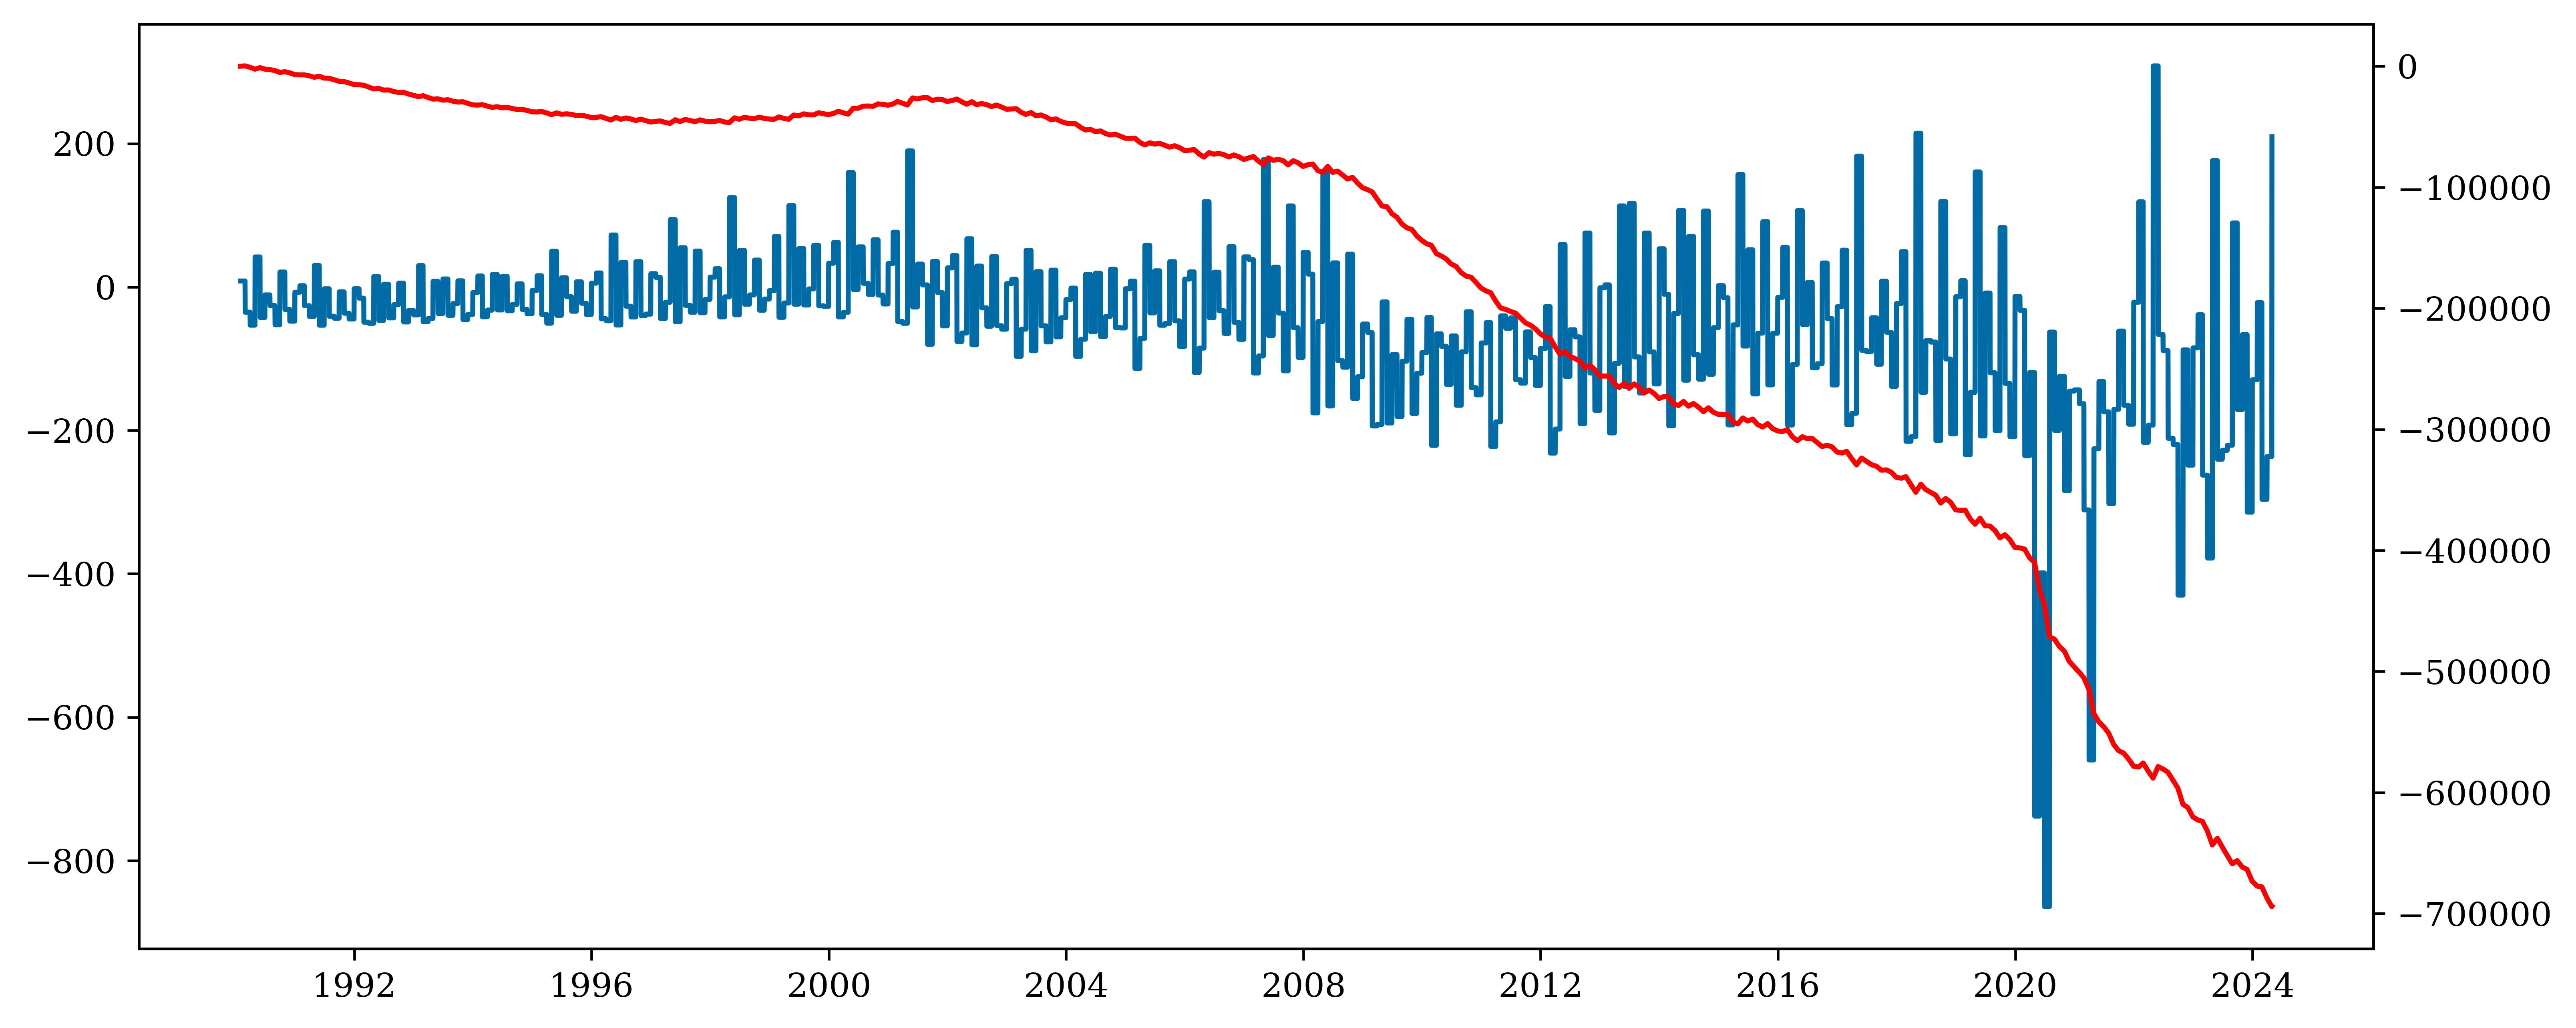

In [ ]:
plt.plot(deficit_d, label="Monthly deficit daily resample")
ax2 = plt.twinx()
ax2.plot(deficit_cs, label="Cumulative deficit daily resample", color="red")
plt.show()
# #NetLiquidity3 -= deficit_d

### MATPLOTLIB STANDARD COLOR CHOICES

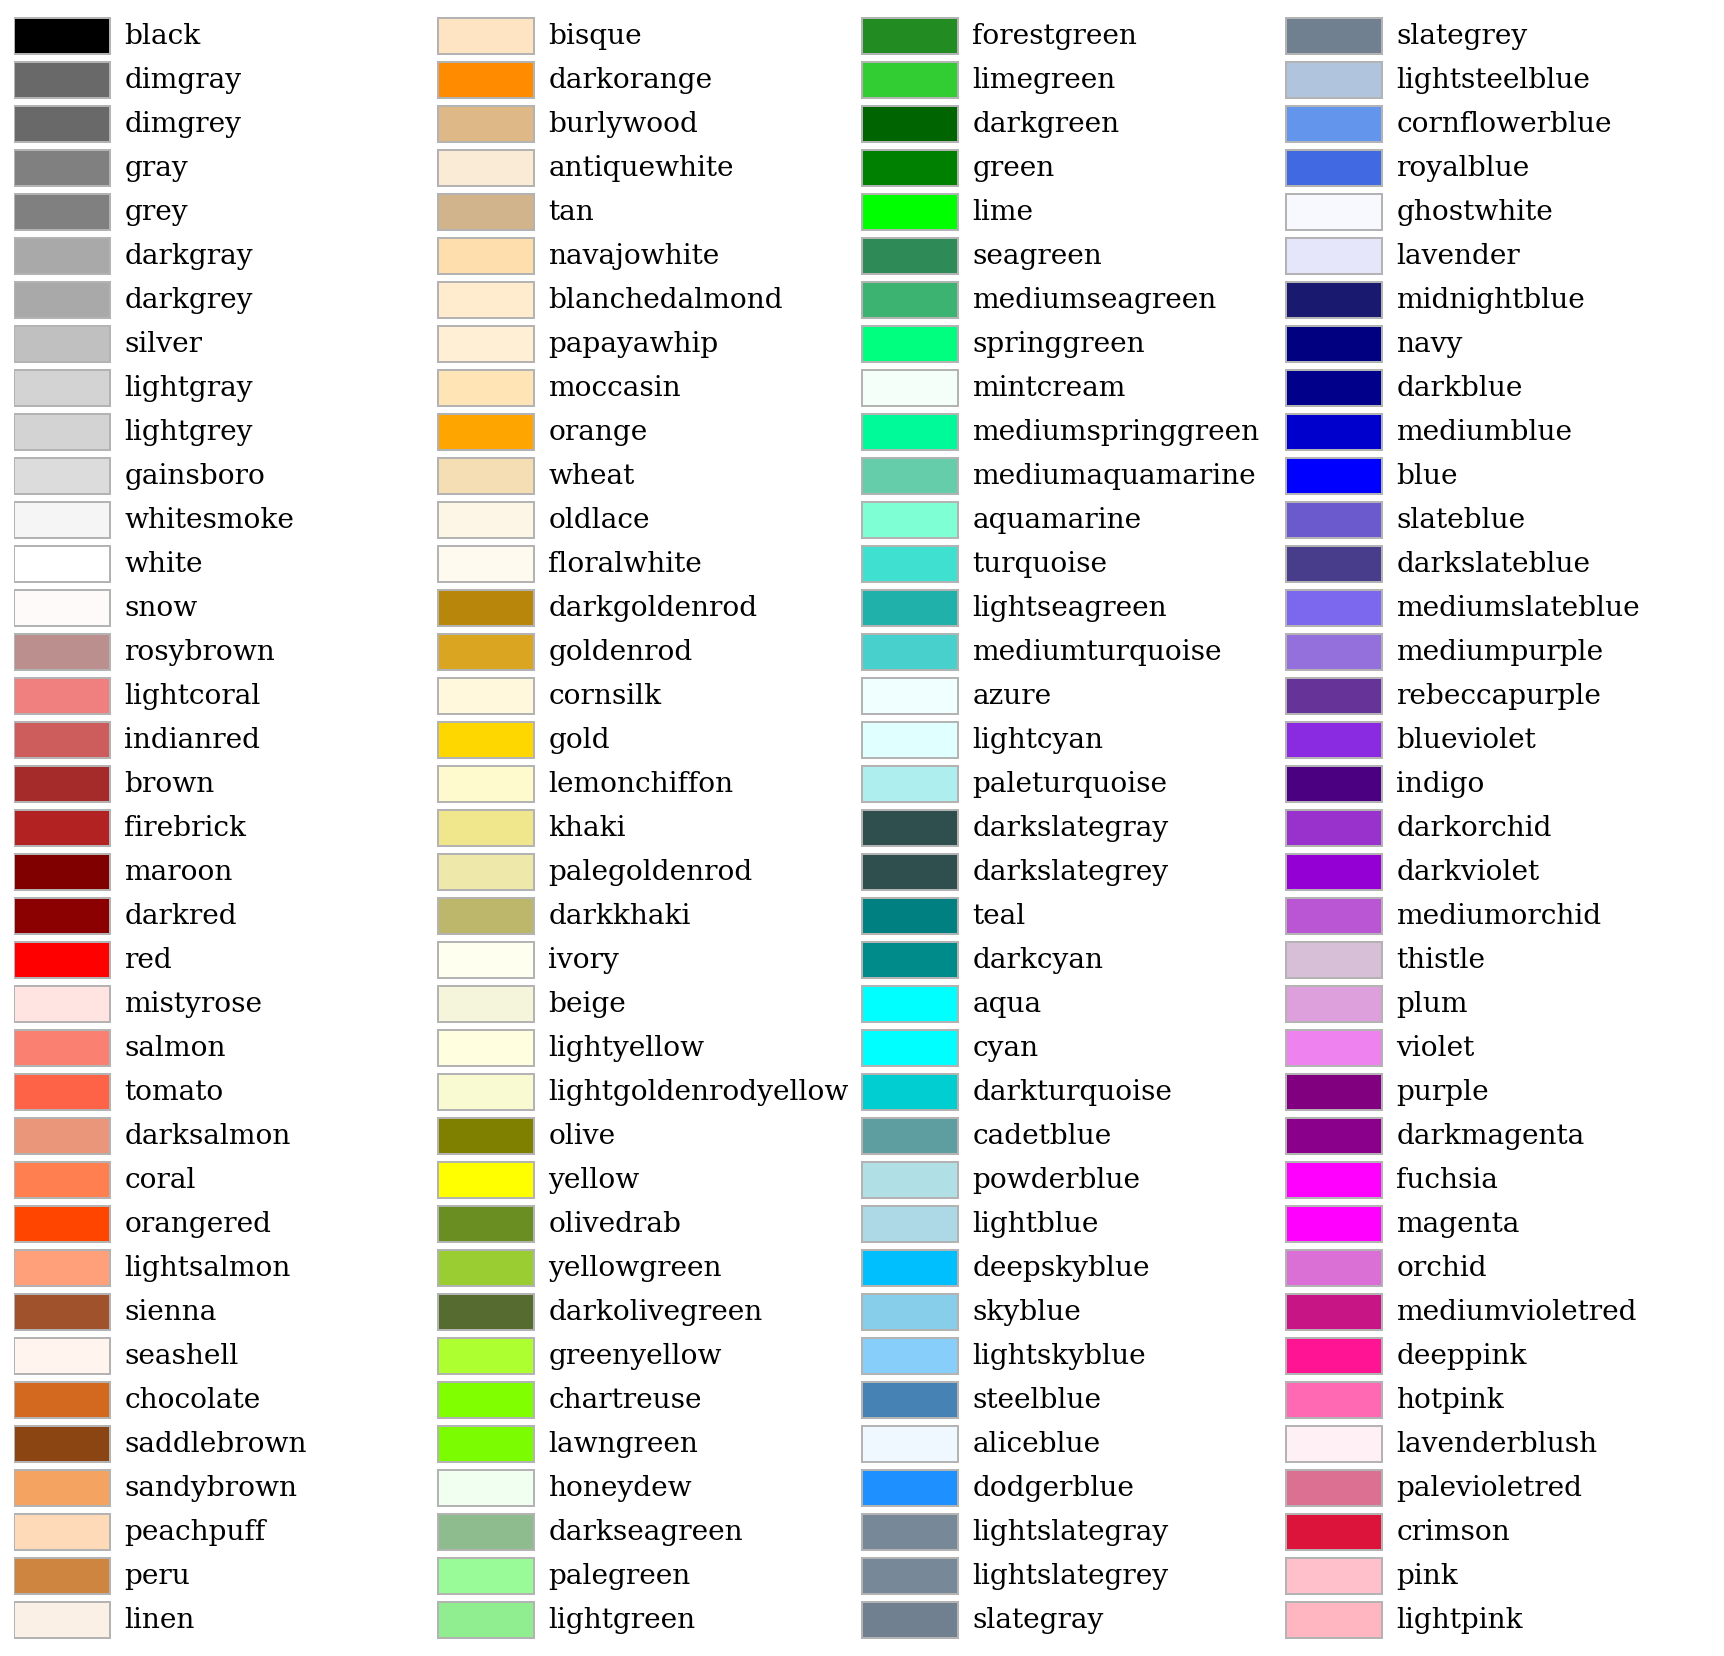

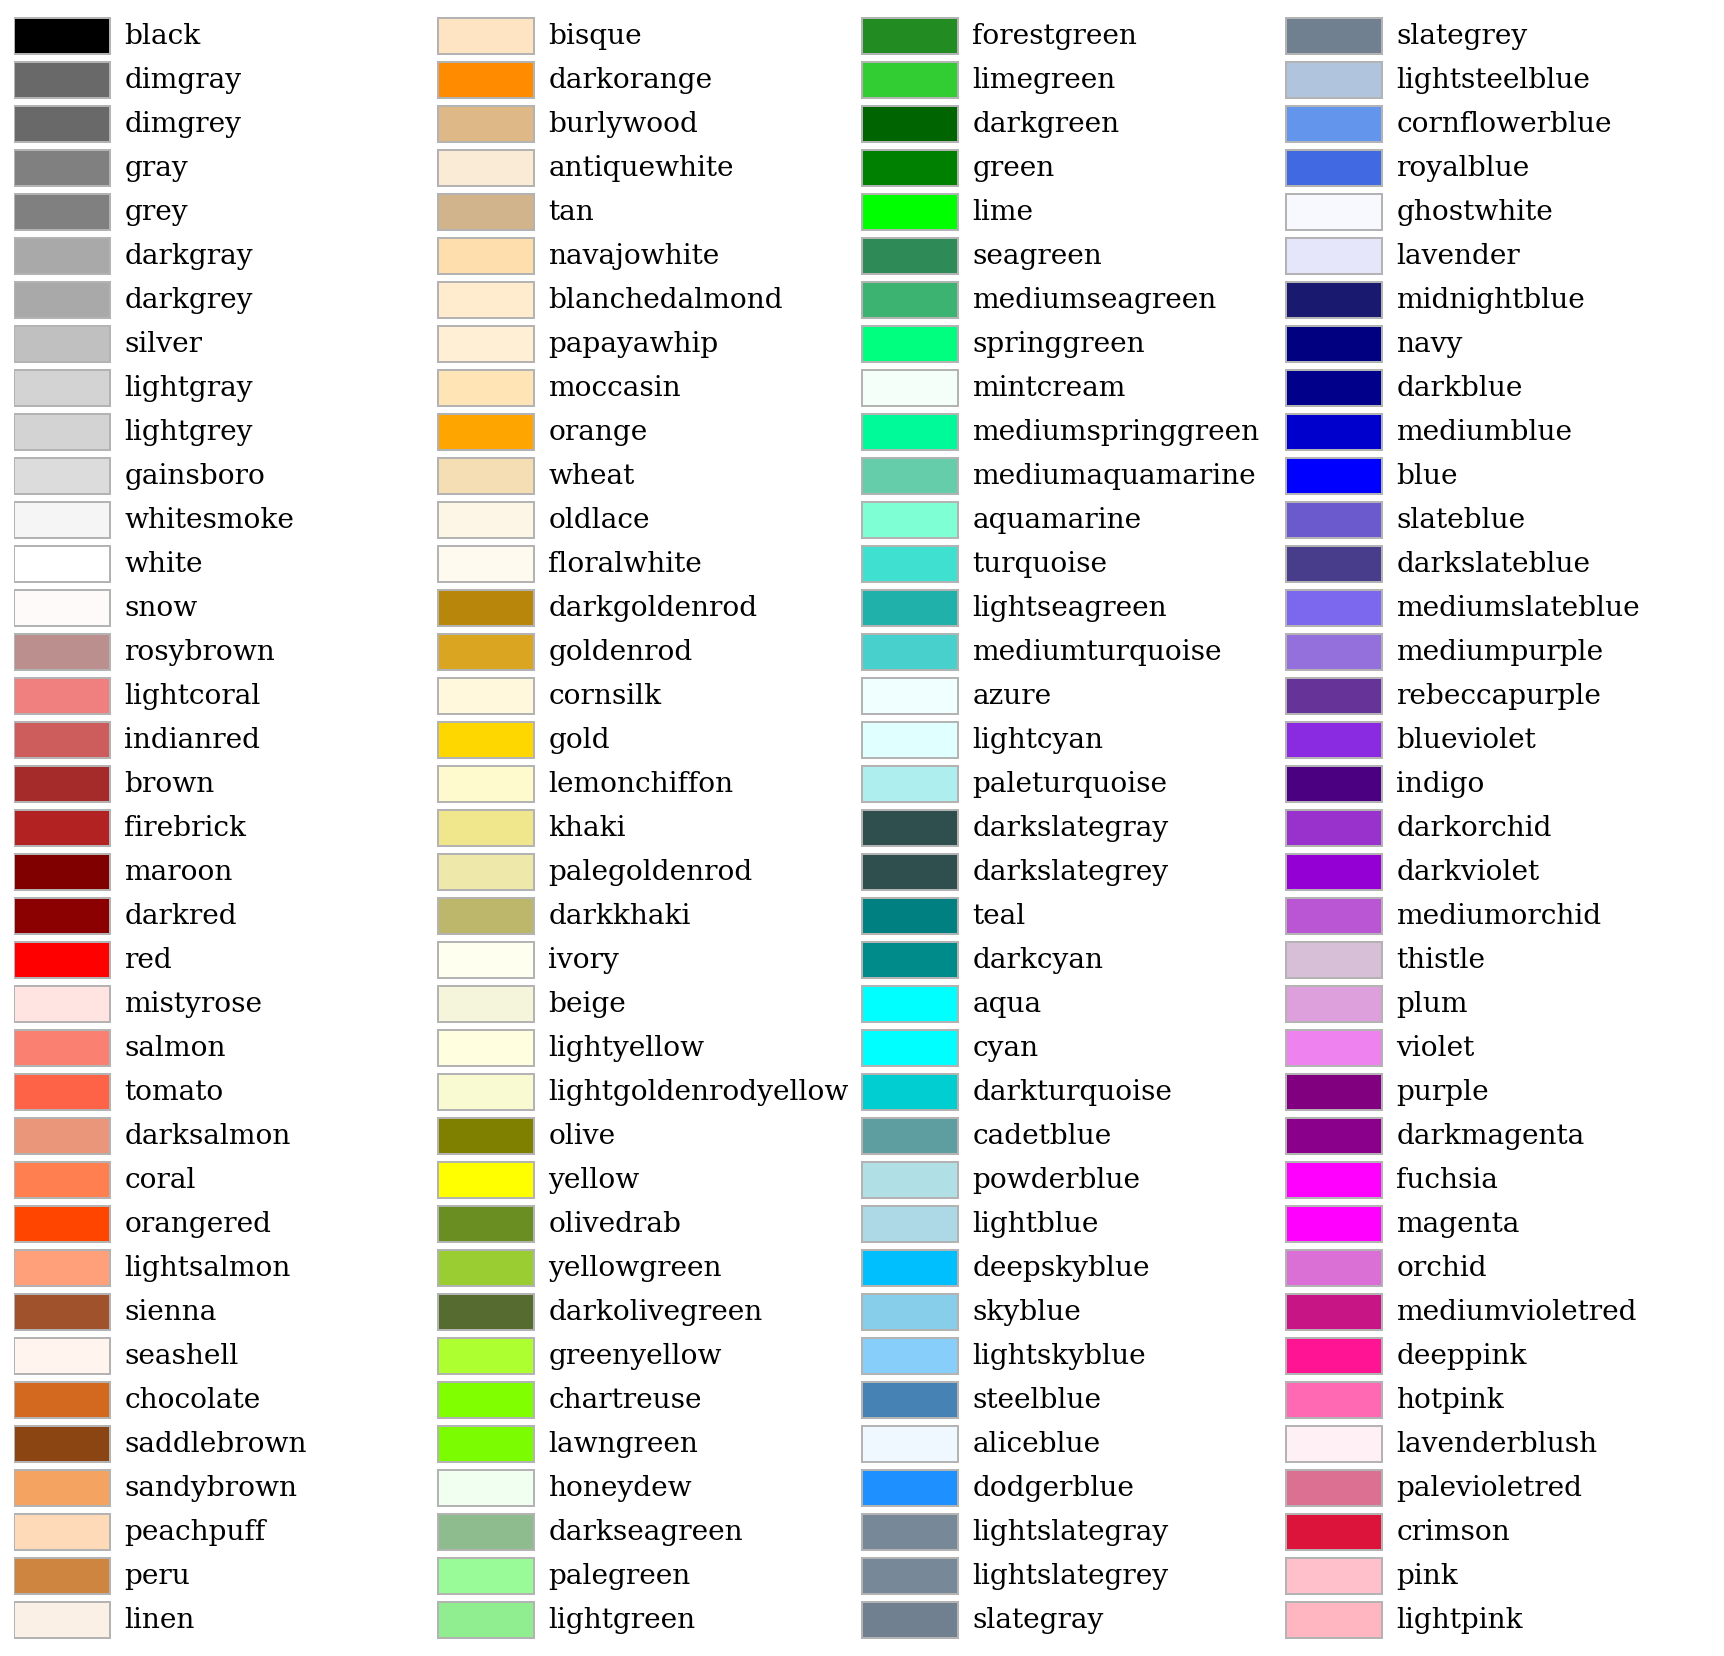

In [ ]:
Charting.plot_colortable()